# Text analysis

This notebook contains code for the  analysis of text data used in the project: Public attitudes and ethical guidelines in digital field experiments (digex).

# TO DO

**We can roughly use the below bullet points taken from [2022-digex-study-design](https://docs.google.com/document/d/1nsaXEn04s9LTsjqrpbUpZlyQ3CAcuqkOwy1ZM0d-kKY/edit#) as section headings for this notebook to conduct the exploratory analysis**:

- To further address questions 1-3, open-ended free-text inputs of both the open “other” options of selection items and the  open-ended free-text answers (i.e., what do you think it means for an academic study to receive "ethical approval”, describe any concerns you might have, what additional information about the study or the researchers that would influence your level of concern, are there any other features of research that are important for determining your level of concern, are there any additional factors that you think should be considered) will be analyzed using a mixed-methods approach to detect common topics, sentiments, and themes. 
 
- The mixed-methods analysis approach will consist of combining quantitative textual analysis, specifically, topic (detection) modeling and sentiment analysis, with qualitative coding, specifically, structured tabular thematic analysis (ST-TA). Topic modeling will involve applying Latent Dirichlet Allocation to identify words within each  open-ended free-text response that are most frequently associated with each of the k identified topics, and produce the probability that each open-ended free-text response within the corpus of responses is associated with each of k topics (Jelodar et al. 2019). Sentiment analysis will involve assigning a polarity score in the range [−1, 1] through the Valence Aware Dictionary for sEntiment Reasoning (VADER) method. VADER is a lexicon-based sentiment analysis engine that combines lexicon-based methods with a rule-based modeling consisting of human validated rules Elbagir and Yang (2019). Models will be implemented using the R package topicmodels and the Python packages Natural Language Toolkit (NLTK). 

- The purpose of manual coding is to validate the topic models, specifically, the representatives of the detected topics and the number of topics k, and to identify further themes (Züll 2016). To implement ST-TA we will follow the method described by Robinson (2021). One to two coders will qualitatively identify themes mentioned by the participants and subsequently categorize all responses accordingly in order to receive a frequency measure. Specifically, coders will read the responses and add each theme as a column in a coding sheet. It will be coded whether the respective theme appears in the other responses (= 1) or not (= 0). If a coder encounters new relevant themes, they will be added and coded later. Nonsense responses will be excluded during coding. Ambiguities will be discussed and solved in pairs. If no solution can be found, a third coder will be consulted. Results from the  open-ended free-text items will be displayed in frequency tables or plots, word clouds, and summarized in quotes. 

## Set working directory

In [1]:
import pathlib   # Change cwd
import os 

path = pathlib.Path.cwd().parent
os.chdir(path)

## Imports

In [2]:
import yaml   # 3rd party packages
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

from digex_src import config    # Local imports
from digex_src import preprocess_data
from digex_src.load_data import get_data_filepath

warnings.filterwarnings('ignore')    # Ignore warnings

ImportError: cannot import name 'preprocess_data' from 'digex_src' (/Users/jasonburton/Documents/GitHub/article-digex-survey/code/digex_src/__init__.py)

## Plotting presets

In [ ]:
digex_style = config.MPL_STYLE_FILEPATH
digex_palette = config.PALETTE

plt.style.use(digex_style)
sns.color_palette(digex_palette)

## Load processed data

In [ ]:
processed_data_path = get_data_filepath(
    file=config.PROCESSED_DATA_FILEPATH, 
    data_path=config.PROCESSED_DATA_DIR,
    main=False
) 

digex_df = pd.read_csv(processed_data_path, index_col=0)

digex_df.head()

In [3]:
digex_df = pd.read_csv('/Users/jasonburton/Documents/GitHub/article-digex-survey/data/processed/digex-survey-responses-processed.csv', index_col=0)

digex_df.head()

,duration_sec,finished,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos,aware_sm_advan_score,aware_sm_interact_score,aware_sm_use_score
1,912.0,True,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,9
2,720.0,True,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,9
3,1874.0,True,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5
4,1264.0,True,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,1.0,NaN,8.0,NaN,NaN,NaN,NaN,1,1,6
5,556.0,True,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,9


## Exploratory data analysis

Resources:
- see `docs/resources/`
- Text as Data, Chris Bail

**Variables to examine: 15, 17, 18, 20, 21, 23, 24, 26, 27, 37, 45-50**

I think the variable list above is off (e.g., variable 15 and 18 are not text).

#### Variable 14: understanding of ethical approval

In [4]:
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer

Get the most frequent words used.

In [5]:
def get_tf_top_features(documents, n_top=25):
  vect = CountVectorizer(stop_words='english', ngram_range= (1,1))
  tf = vect.fit_transform(documents)
  importance = np.argsort(np.asarray(tf.sum(axis=0)).ravel())[::-1]
  tf_feature_names = np.array(vect.get_feature_names_out())
  return tf_feature_names[importance[:n_top]]

print('The 25 words with the highest TF:\n', get_tf_top_features(digex_df['ethic_appr']))

The 25 words with the highest TF:
 ['ethical' 'approval' 'means' 'research' 'data' 'study' 'institution'
 'think' 'harm' 'participants' 'experiment' 'sure' 'standards'
 'researchers' 'people' 'information' 'way' 'methods' 'make' 'board'
 'used' 'doing' 'researcher' 'ensure' 'need']


Make a wordcloud (note -- this isn't quite right because it's using unprocessed text).

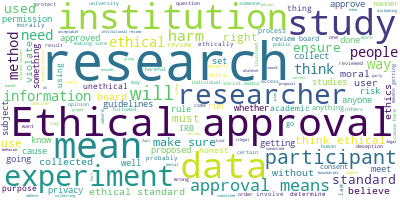

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(digex_df['ethic_appr'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Get the words with the highest TFIDF.

In [7]:
def get_tfidf_top_features(documents, n_top=25):
  tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=3,  stop_words='english')
  tfidf = tfidf_vectorizer.fit_transform(documents)
  importance = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
  tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
  return tfidf_feature_names[importance[:n_top]]

print('The 25 words with the highest TFIDF:\n', get_tfidf_top_features(digex_df['ethic_appr']))

The 25 words with the highest TFIDF:
 ['ethical' 'approval' 'means' 'research' 'data' 'study' 'institution'
 'think' 'harm' 'participants' 'experiment' 'standards' 'sure' 'people'
 'way' 'researchers' 'methods' 'doing' 'make' 'information' 'researcher'
 'used' 'board' 'ensure' 'need']


Preprocess text and implement LDA topic model.

In [8]:
# lowercase, tokenize, remove stopwords

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopword_tokens


ethic_txt = digex_df['ethic_appr'].apply(simple_preprocess)
ethic_txt = ethic_txt.apply(remove_stopword_tokens)
ethic_txt


1      [scope, project, actions, cross, certain, boun...
2      [think, ethical, approval, means, experiment, ...
3      [researchers, focus, ethical, standards, gain,...
4      [think, ethical, approval, means, things, coll...
5                                           [set, rules]
                             ...                        
495                   [approval, type, thing, deceptive]
496    [researchers, taking, mental, note, standards,...
497    [think, ethical, approval, means, institutions...
498    [think, ethical, approval, means, experiment, ...
499    [think, ethical, approval, academic, experimen...
Name: ethic_appr, Length: 499, dtype: object

In [9]:
# lemmatize

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def lemmatization(text):
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        result.append(wordnet.lemmatize(token,pos))
    return result

ethic_txt = ethic_txt.apply(lemmatization)
ethic_txt

1      [scope, project, action, cross, certain, bound...
2      [think, ethical, approval, mean, experiment, g...
3      [researcher, focus, ethical, standard, gain, d...
4      [think, ethical, approval, mean, thing, collec...
5                                            [set, rule]
                             ...                        
495                   [approval, type, thing, deceptive]
496    [researcher, take, mental, note, standard, mea...
497    [think, ethical, approval, mean, institution, ...
498    [think, ethical, approval, mean, experiment, d...
499    [think, ethical, approval, academic, experimen...
Name: ethic_appr, Length: 499, dtype: object

In [10]:
# create gensim corpus

import gensim.corpora as corpora

id2word = corpora.Dictionary(ethic_txt)
texts = ethic_txt
corpus = [id2word.doc2bow(text) for text in texts]

In [11]:
# implement lda... topics aren't very interpretable... we probably need to remove the most frequent words

import gensim
from pprint import pprint

num_topics = 2

# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the keywords in the topics
pprint(lda_model.print_topics())

[(0,
  '0.056*"ethical" + 0.036*"approval" + 0.025*"mean" + 0.024*"data" + '
  '0.022*"research" + 0.020*"study" + 0.018*"researcher" + 0.016*"participant" '
  '+ 0.015*"experiment" + 0.014*"harm"'),
 (1,
  '0.041*"mean" + 0.032*"research" + 0.031*"approval" + 0.027*"ethical" + '
  '0.024*"study" + 0.021*"institution" + 0.016*"think" + 0.016*"experiment" + '
  '0.013*"standard" + 0.013*"participant"')]
